In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
import torch
from lovely_tensors import monkey_patch
monkey_patch()
from src.xil_research_modification.utils import XILUtils
from pathlib import Path
from src.xil_research_modification.experiments.cnn import CNNTwoConv
import matplotlib.pyplot as plt


In [3]:

# define paths
confounded_train_path = Path("08MNIST/confounded_v1/train.pth")
original_test_path = Path("08MNIST/original/test.pth")

imbalanced_weights_path = Path("/Users/zlochinus/Desktop/uni/bakalarka/caipi_improved/caipi_output/imbalanced_weights/model_imbalanced_k100_run4_THIS_ONE.pth")
balanced_weights_path = Path("/Users/zlochinus/Desktop/uni/bakalarka/caipi_improved/caipi_output/balanced_weights/model_balanced_k20_run3_THIS_ONE.pth")
lagrange_weights_path = Path("/Users/zlochinus/Desktop/uni/bakalarka/caipi_improved/caipi_output/lagrange_weights/model_lagrange_k5_run3_THIS_ONE.pth")



In [4]:
labels = [0, 8]

In [5]:
# load dataset
confounded_train_ds = torch.load(confounded_train_path, weights_only=False)
original_test_ds = torch.load(original_test_path, weights_only=False)


In [10]:
# confounded_train_ds
# last 0 is 5923
# original_test_ds
# last 0 is 980

## Imbalanced visualisation

In [6]:
imbalanced_model = CNNTwoConv(num_classes=2)
imbalanced_target_layers = [imbalanced_model.features[3]]
imbalanced_model.load_state_dict(torch.load(imbalanced_weights_path, weights_only=True))

<All keys matched successfully>


Example 0:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [0., 1.000]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [0, 1] with 100.000% certainty. Correct? True


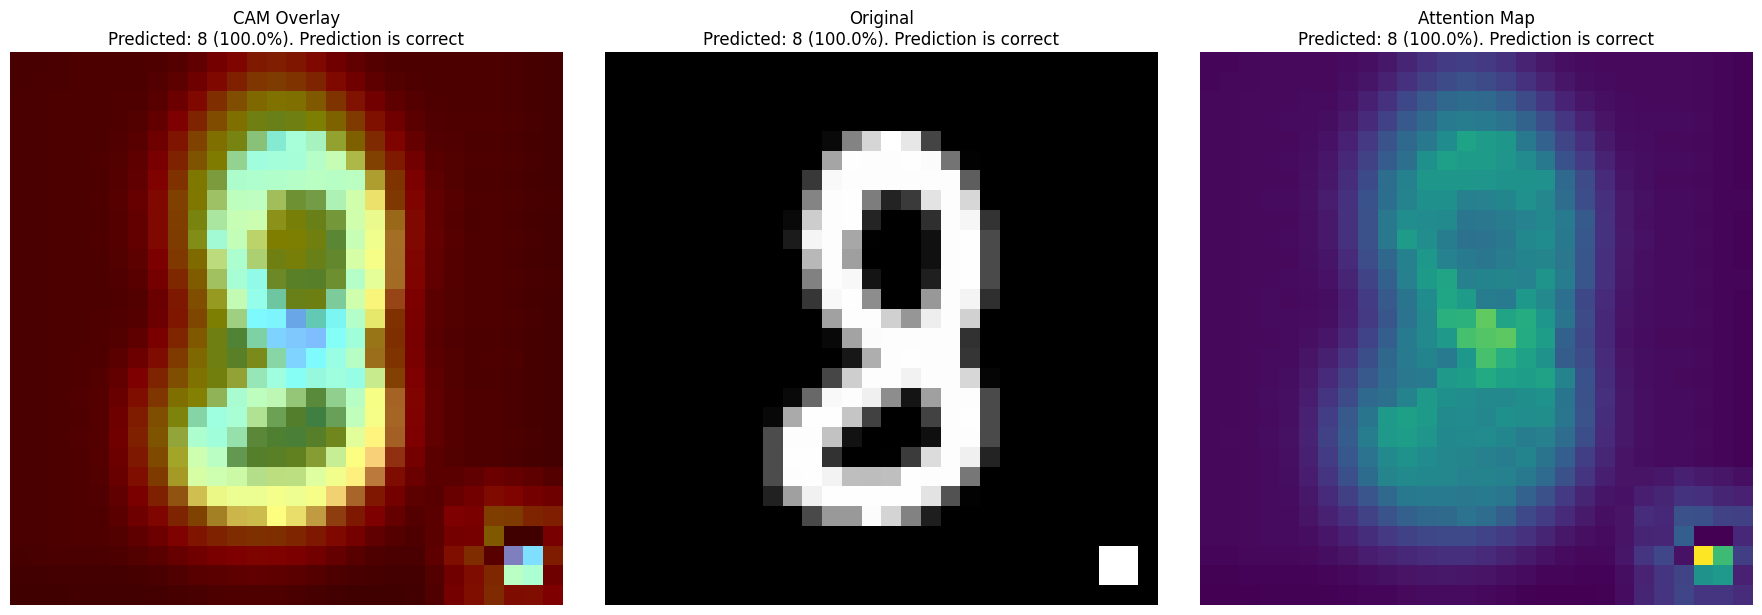


Example 0:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [0., 1.000]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [0, 1] with 98.161% certainty. Correct? True


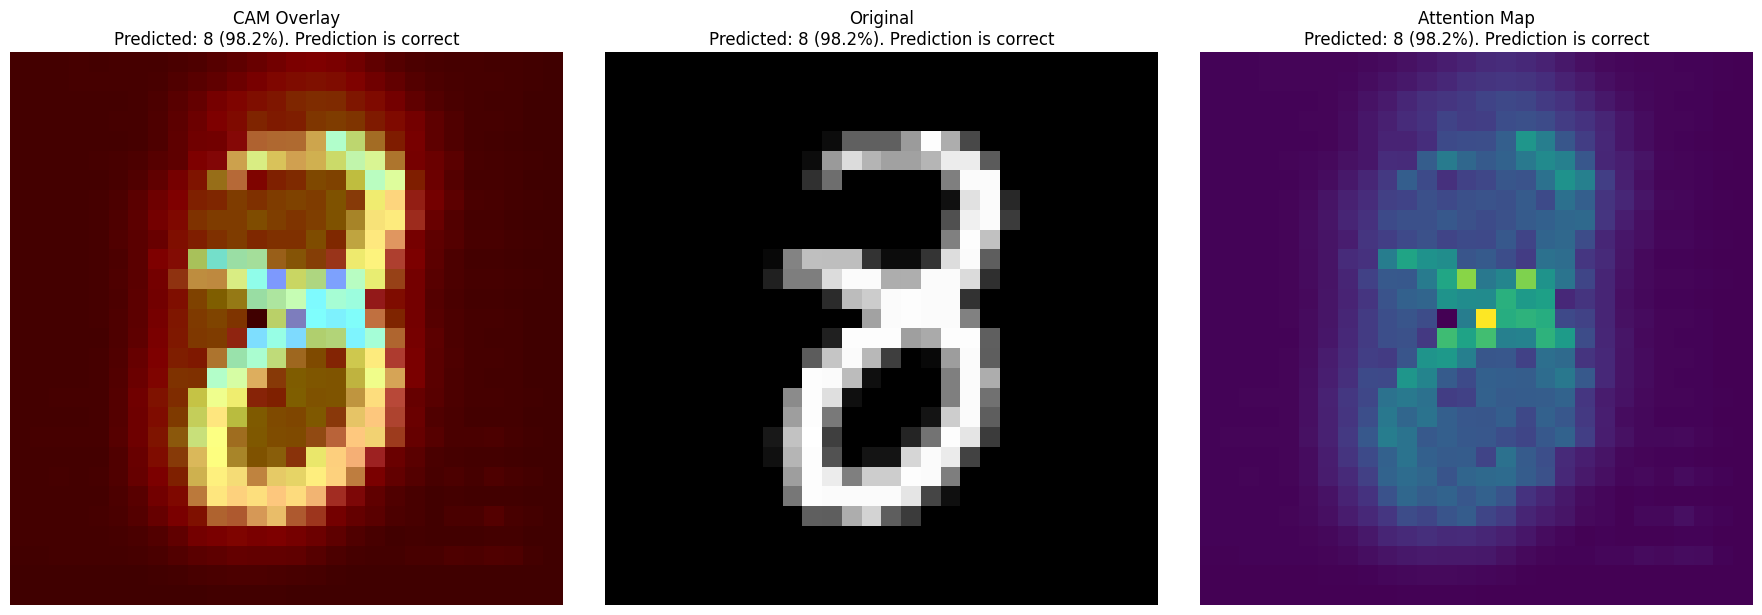

In [16]:

XILUtils.apply_and_show_gradcam(imbalanced_model, imbalanced_target_layers, confounded_train_ds, labels, plt, batch_num=5924, batch_size=1, guided_gradcam=True, correspond_to_targets=True)
XILUtils.apply_and_show_gradcam(imbalanced_model, imbalanced_target_layers, original_test_ds, labels, plt, batch_num=981, batch_size=1, guided_gradcam=True, correspond_to_targets=True)



## Balanced visualisation


In [14]:

balanced_model = CNNTwoConv(num_classes=2)
balanced_target_layers = [balanced_model.features[3]]
balanced_model.load_state_dict(torch.load(balanced_weights_path, weights_only=True))


<All keys matched successfully>


Example 0:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [0., 1.000]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [0, 1] with 100.000% certainty. Correct? True


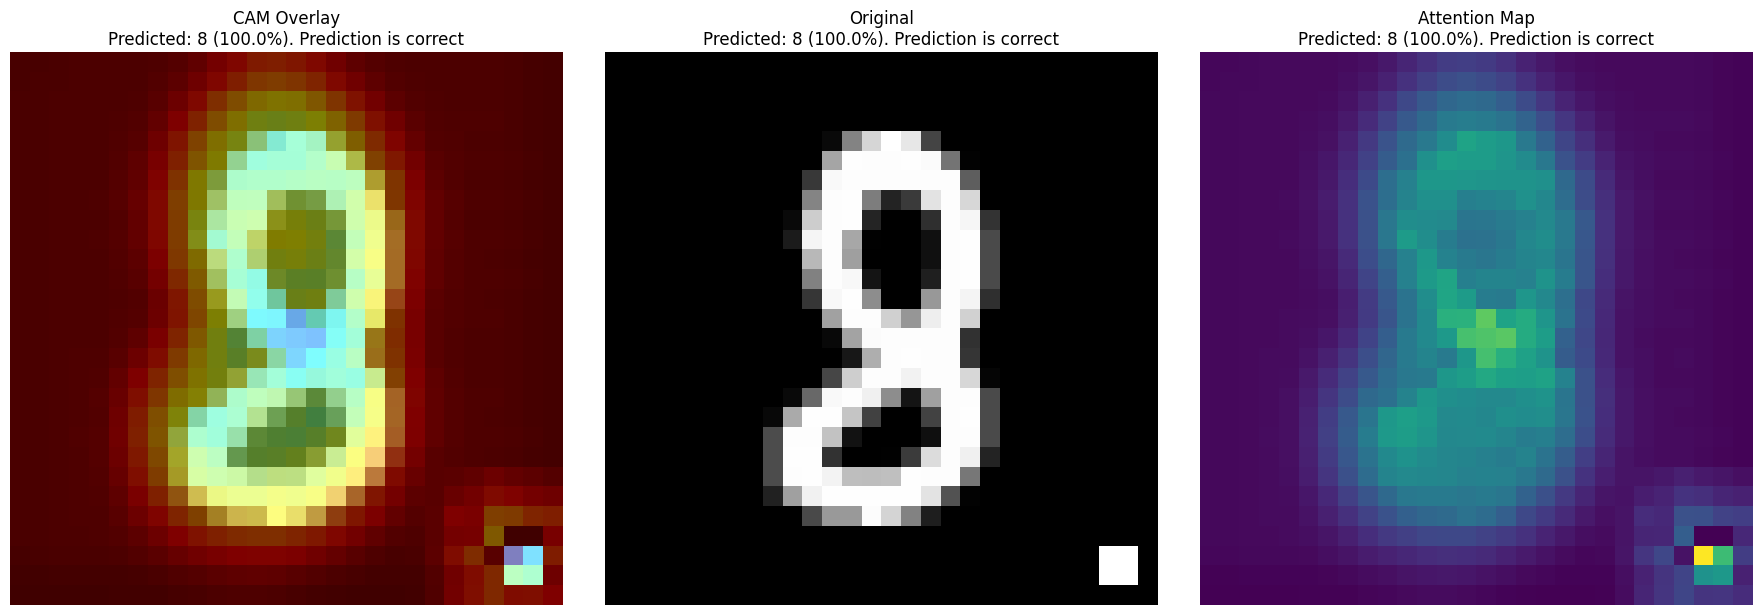


Example 0:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [0., 1.000]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [0, 1] with 97.175% certainty. Correct? True


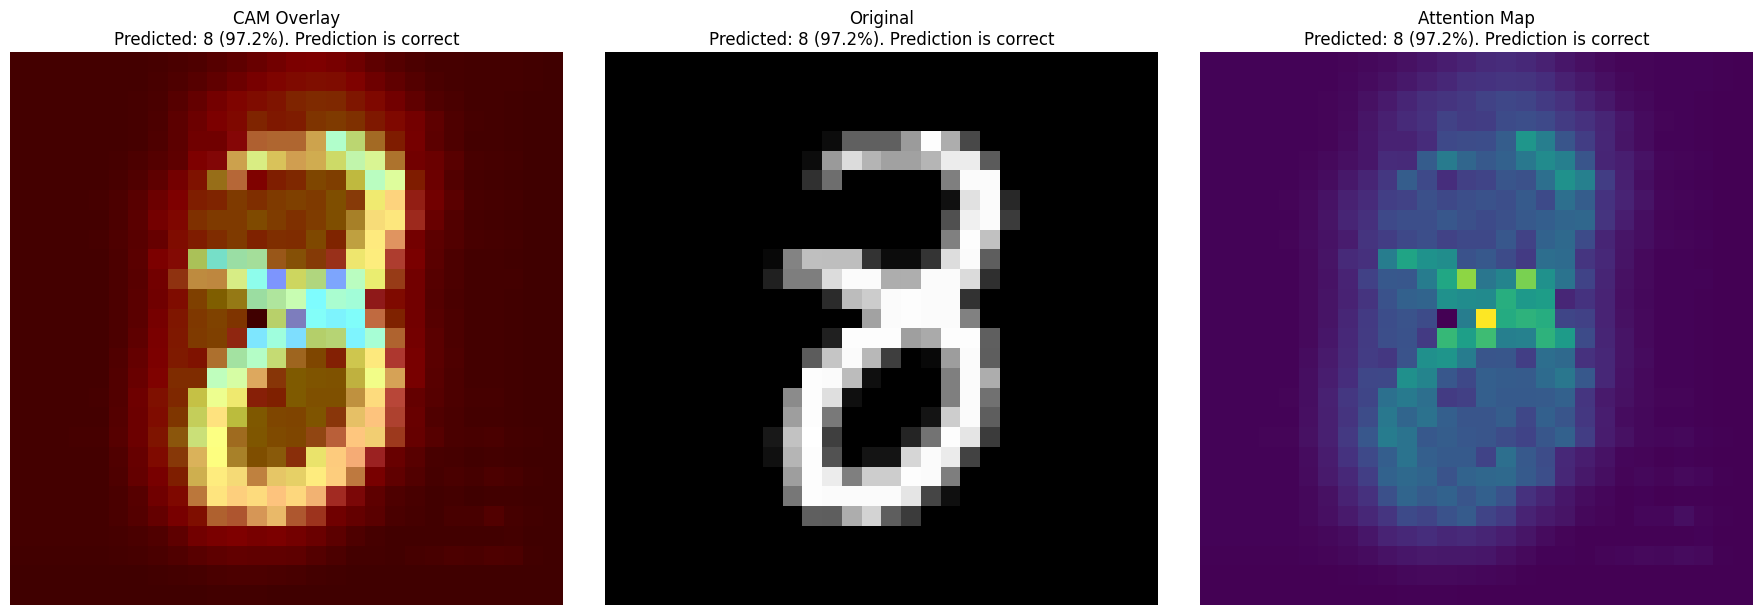

In [17]:

XILUtils.apply_and_show_gradcam(balanced_model, balanced_target_layers, confounded_train_ds, labels, plt, batch_num=5924, batch_size=1, guided_gradcam=True, correspond_to_targets=True)
XILUtils.apply_and_show_gradcam(balanced_model, balanced_target_layers, original_test_ds, labels, plt, batch_num=981, batch_size=1, guided_gradcam=True, correspond_to_targets=True)


## Lagrange Vissualisation

In [18]:
lagrange_model = CNNTwoConv(num_classes=2)
lagrange_target_layers = [lagrange_model.features[3]]
lagrange_model.load_state_dict(torch.load(lagrange_weights_path, weights_only=True))


<All keys matched successfully>


Example 0:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [0., 1.000]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [0, 1] with 100.000% certainty. Correct? True


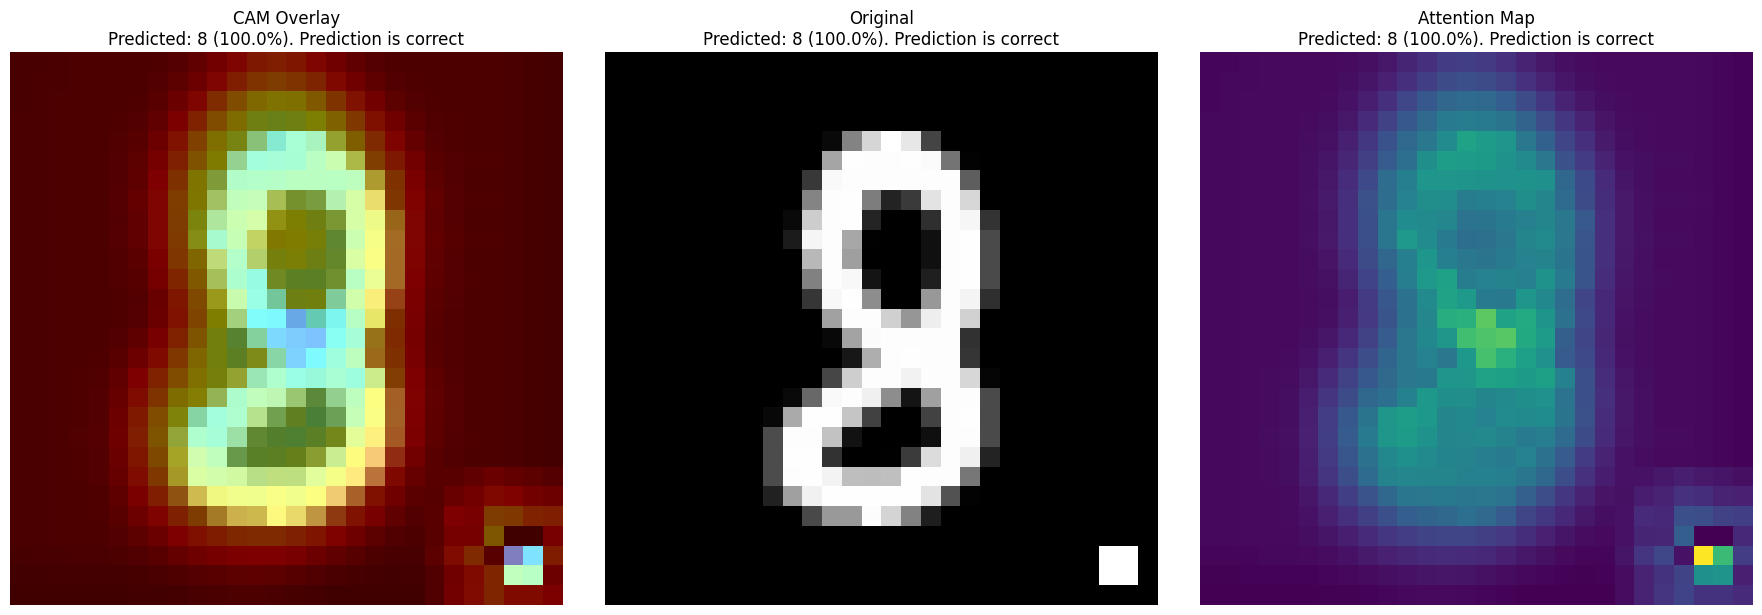


Example 0:
Shape of example: torch.Size([1, 28, 28])
Target of example: tensor[2] μ=0.500 σ=0.707 [0., 1.000]
Predicted target: tensor[2] i64 μ=0.500 σ=0.707 [0, 1] with 97.025% certainty. Correct? True


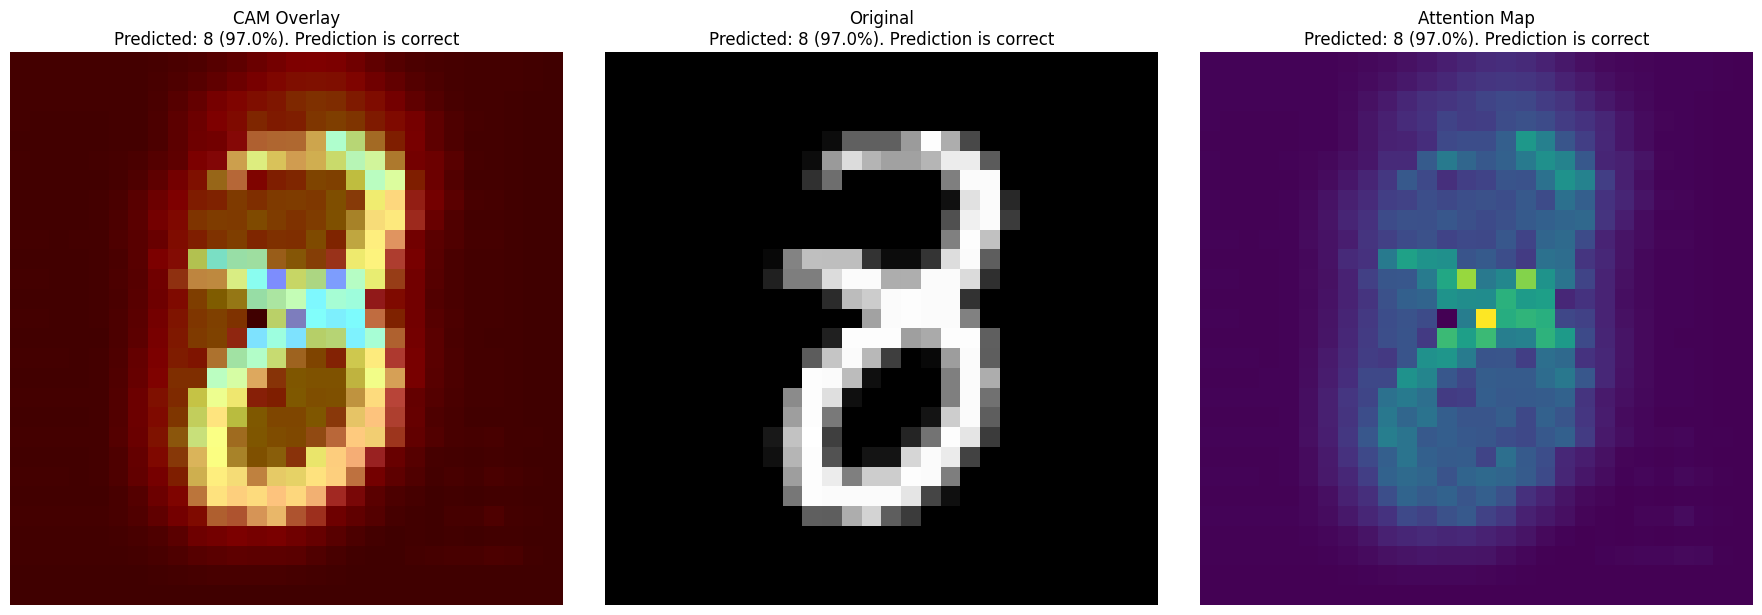

In [20]:

XILUtils.apply_and_show_gradcam(lagrange_model, lagrange_target_layers, confounded_train_ds, labels, plt, batch_num=5924, batch_size=1, guided_gradcam=True, correspond_to_targets=True)
XILUtils.apply_and_show_gradcam(lagrange_model, lagrange_target_layers, original_test_ds, labels, plt, batch_num=981, batch_size=1, guided_gradcam=True, correspond_to_targets=True)


In [21]:
from PIL import Image
import os

def vertically_concatenate(img_path1, img_path2, output_path):
    # 1. Open the images
    # We use 'with' to ensure files are closed properly after we load them
    image1 = Image.open(img_path1)
    image2 = Image.open(img_path2)

    # 2. Assert dimensions match (as per your requirements)
    if image1.width != image2.width:
        # Intuition: You can't cleanly stack a wide brick on a narrow brick 
        # without deciding how to align them (left, center, right).
        raise ValueError("Images must have the same width for this specific script.")

    # 3. Calculate dimensions for the new canvas
    total_width = image1.width
    total_height = image1.height + image2.height

    # 4. Create the blank canvas
    # 'RGB' means we are working with standard color. 
    # Use 'RGBA' if your images have transparency.
    new_image = Image.new('RGB', (total_width, total_height))

    # 5. Paste the images
    # Coordinates are (x, y), starting from top-left (0,0)
    new_image.paste(image1, (0, 0))  # Paste first image at the top
    new_image.paste(image2, (0, image1.height))  # Paste second image right below the first

    # 6. Save the result
    new_image.save(output_path)
    print(f"Saved concatenated image to {output_path}")


In [22]:
tps = ["balanced", "imbalanced", "lagrange"]
for i in tps:

    # Run the function
    vertically_concatenate(f'imgs/{i}_8_dot_explanation.png', f'imgs/{i}_8_explanation.png', f'imgs/{i}_explanations.png')


Saved concatenated image to imgs/balanced_explanations.png
Saved concatenated image to imgs/imbalanced_explanations.png
Saved concatenated image to imgs/lagrange_explanations.png
